In [64]:
import cupy as cp

def rd_solve(y0,f,D,dt=.01,d=1,it = 1000):
    '''
    
    Solves a reaction-diffusion system for n_var variables and n_dim dimensions.

    Parameters

    ----------

    y0 : array

        Initial conditions.

    f : array

        Array of functions of the form f(y,t) where y is a vector of the variables and t is the time.
    
    dt : float
    
        Time step.

    D : array

        Array of diffusion coefficients.
    
    d : float or array

        Spatial step.
    
    it : int

        Number of iterations.

    Returns

    -------

    y : array

        Array of solutions for each variable after all iterations.

    '''
    
    y = cp.array(y0)

    def laplace(y):
        '''
        Calculates the laplacian of each variable in y using cp.gradient().
        '''
        
        return cp.sum(cp.array(cp.gradient(y, d, axis=(1,2),edge_order=2)),axis=0)

    for i in range(it):
        y = y + dt*(f(y,i*dt) + laplace(y))
    
    return y


In [65]:
def f(y,t):
    '''
    
    Function for the SIR model.

    Parameters

    ----------

    y : array

        Array of variables.

    beta : float

        Infection rate.

    gamma : float

        Recovery rate.

    Returns

    -------

    f : array

        Array of functions.

    '''
    
    Lx,Ly = y[0].shape
    f = cp.zeros((2,Lx,Ly))

    f[0] = -beta*y[0]*y[1]
    f[1] = beta*y[0]*y[1] - gamma*y[1]

    return f

beta = 1
gamma = .2

D = cp.array([0,1])
Lx = 512
Ly = 512

y0 = cp.zeros((2,Lx,Ly))
y0[0] = 1
y0[1,:,0] = 1

y = rd_solve(y0,f,D,dt=.01,d=1,it = 1000)



In [72]:
#laplacian of y0 using cp.gradient()

laplace = cp.sum(cp.array(cp.gradient(y0, 1,edge_order=2)),axis=0)

laplace.shape

ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

In [1]:
import numpy as np
x = np.arange(0,1,.01)
x.reshape((1,-1))

array([[0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99]])

In [66]:
y[0,:,:]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

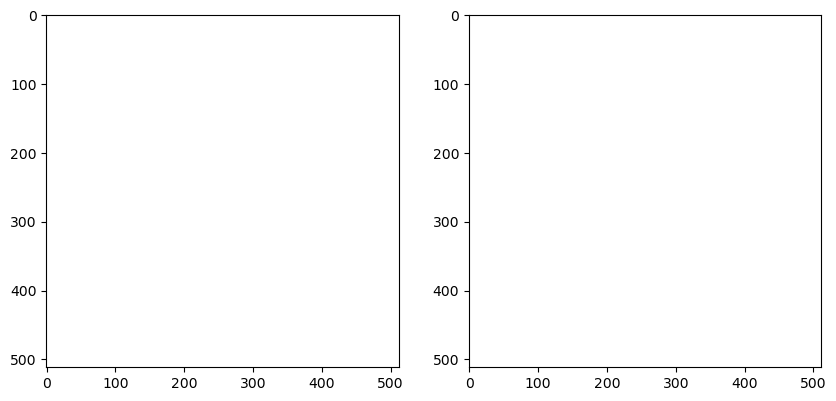

In [44]:
#PLOT

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize = (10,5))

ax[0].imshow(y[0,:,:].get(),interpolation=None)
ax[1].imshow(y[1,:,:].get(),interpolation=None)

plt.show()